In [1]:
# importing some importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.linear_model import LinearRegression
sns.set()   # will affect how all matplotlib plots look, even if you don't make them with seaborn

#### Loading the raw data

In [2]:
raw_data = pd.read_csv('cardata.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


#### Preprocessing

In [3]:
# Exploring the descriptive statistics of the variables
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
# Dropping the less significant variables
data = raw_data.drop(['Model'], axis = 1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [5]:
# handeling the missing values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

#### Rule of thumb: if you are removing <5% of the observations, you are free to just remove all that have missing values

In [6]:
data_no_missing = data.dropna(axis=0)

In [7]:
data_no_missing.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### Exploring the probability distribution functions for the features

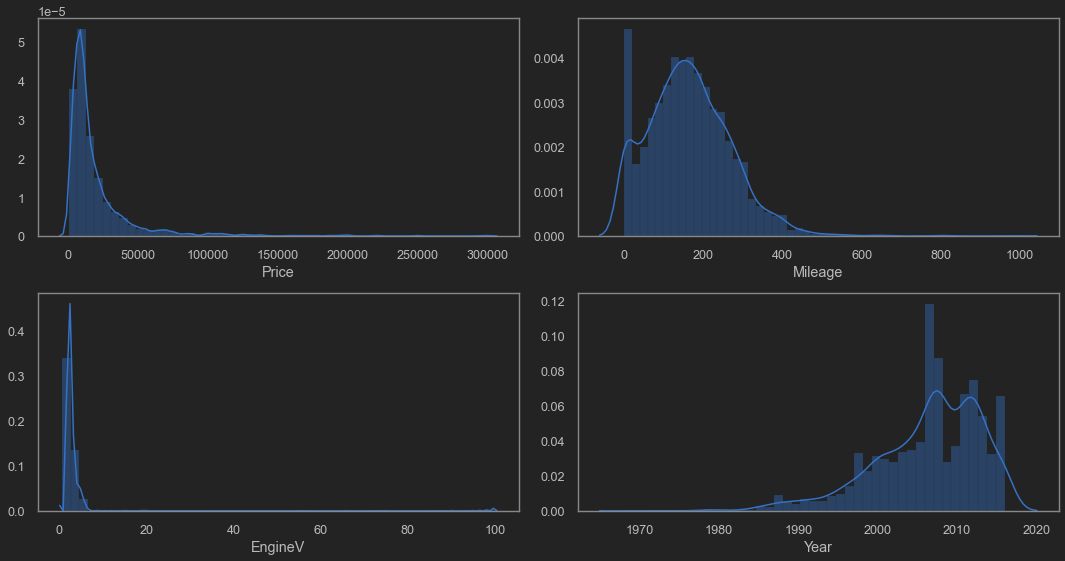

In [8]:
# importing jupyter themes for dark mode plot (optional)
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# plotting the features using subplots
f,axs = plt.subplots(2,2,figsize=(15,8))
sns.distplot(data_no_missing['Price'], ax=axs[0,0])
sns.distplot(data_no_missing['Mileage'], ax=axs[0,1])
sns.distplot(data_no_missing['EngineV'], ax=axs[1,0])
sns.distplot(data_no_missing['Year'], ax = axs[1,1])
plt.tight_layout()

#### Dealing with outliers

In [9]:
# dealing with outliers, removing the top 1% from the price columns
q1 = data_no_missing['Price'].quantile(0.99)
data1 = data_no_missing[data_no_missing['Price']<q1]
data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [10]:
# missing values in mileage column: represented by 99.99 here
q2 = data1['Mileage'].quantile(0.99)
data2 = data1[data1['Mileage']<q2]

In [11]:
# The engine volume plot a little strange
print(data2['EngineV'].sort_values())
# we see various 99.99 values, which is a convention to show na values. Normally the engine volume falls between 0.6 to 6.5
data3 = data2[data2['EngineV']<6.5]

2512     0.60
188      0.65
2214     1.00
2196     1.00
1923     1.00
        ...  
256     99.99
1264    99.99
3114    99.99
2349    99.99
930     99.99
Name: EngineV, Length: 3944, dtype: float64


In [12]:
# The year column shows that there are some vintage cars also, whose prices are high despite of being old.
q3 = data3['Year'].quantile(0.01)
data4 = data3[data3['Year']>q3]

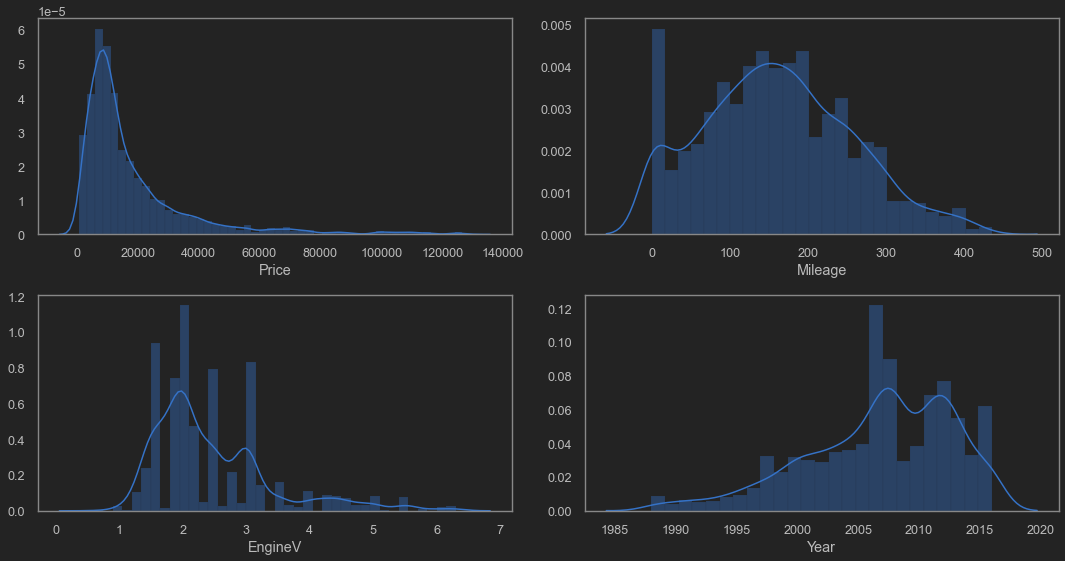

In [13]:
f, axs = plt.subplots(2, 2, figsize=(15,8))
sns.distplot(data4['Price'], ax = axs[0,0])
sns.distplot(data4['Mileage'], ax = axs[0,1])
sns.distplot(data4['EngineV'], ax = axs[1,0])
sns.distplot(data4['Year'], ax = axs[1,1])
plt.tight_layout()

In [14]:
data_final = data4.reset_index(drop=True)
data_final.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking for OLS (Ordinary Least Squares) assumptions

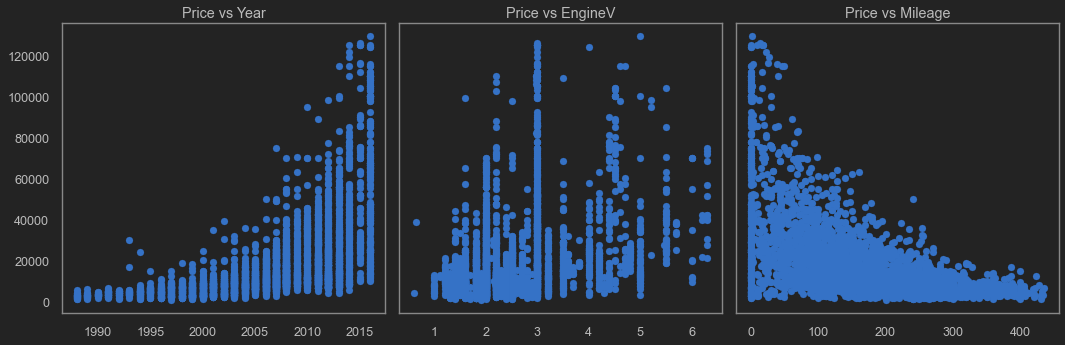

In [15]:
f, axs = plt.subplots(1,3, sharey=True, figsize=(15,5))
axs[0].scatter(data_final['Year'], data_final['Price'])
axs[0].set_title('Price vs Year')

axs[1].scatter(data_final['EngineV'], data_final['Price'])
axs[1].set_title('Price vs EngineV')

axs[2].scatter(data_final['Mileage'], data_final['Price'])
axs[2].set_title('Price vs Mileage')

plt.tight_layout()

##### We can see that the patterns are not linear, so we can not perform linear regression here. We will convert it by taking log transform.

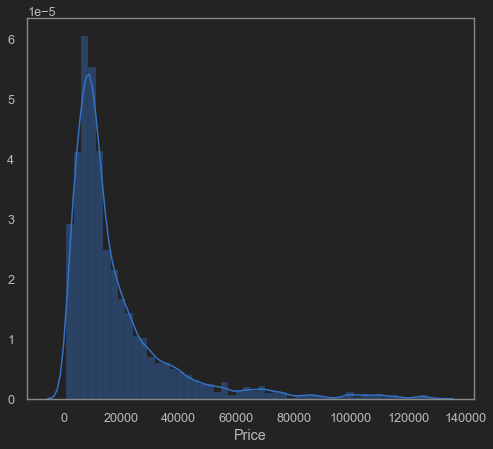

In [16]:
sns.distplot(data_final['Price'])
plt.show()

In [17]:
# making a new column of prices after taking log
data_final['LogPrice'] = np.log(data_final['Price'])
data_final

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,LogPrice
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


##### Again plotting the variable but this time with log price.

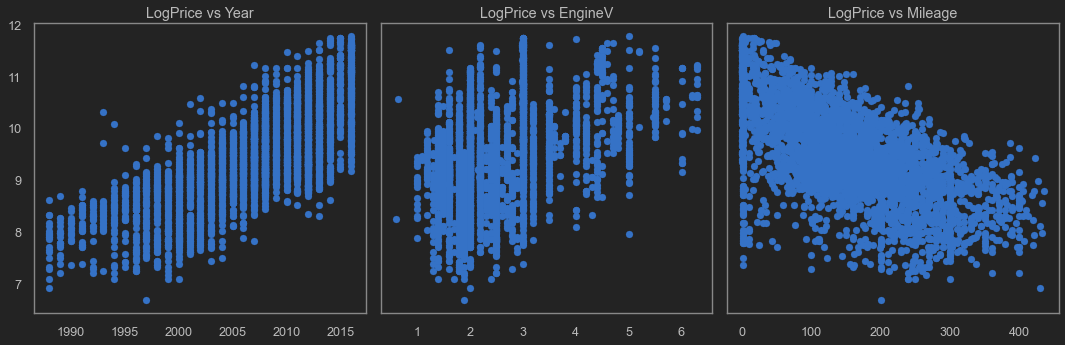

In [18]:
f, axs = plt.subplots(1,3, sharey=True, figsize=(15,5))
axs[0].scatter(data_final['Year'], data_final['LogPrice'])
axs[0].set_title('LogPrice vs Year')

axs[1].scatter(data_final['EngineV'], data_final['LogPrice'])
axs[1].set_title('LogPrice vs EngineV')

axs[2].scatter(data_final['Mileage'], data_final['LogPrice'])
axs[2].set_title('LogPrice vs Mileage')

plt.tight_layout()

##### Now we can see a linear pattern between the variables

In [19]:
# Dropping the Price column as we will only deal with log price for now.
data_final = data_final.drop('Price', axis=1)

### Multicollinearity
#### It is logical that year and mileage will be correlated

In [20]:
data_final.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'LogPrice'], dtype=object)

In [21]:
# we have to use statsmodel as sklearn has no method to check for multicollinearity
from statsmodels.stats.outliers_influence import  variance_inflation_factor
variables = data_final[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIL'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIL,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


###### Range of VIF is [0, +inf)
###### VIF = 1: No multicollinearity
###### 1<VIF<5: perfectly ok
###### VIF>6: unacceptable (generally, sometimes it is 6, 7 or even 10)

In [22]:
# we will drop only year as it is around 10
data_ = data_final.drop(['Year'], axis=1)

## Creating dummy variables
##### Using pandas

In [23]:
data_with_dummies = pd.get_dummies(data_final, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,Year,LogPrice,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [24]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Year', 'LogPrice', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [25]:
cols = ['LogPrice', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,LogPrice,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Model

In [26]:
target = data_preprocessed['LogPrice']
inputs = data_preprocessed.drop(['LogPrice'], axis=1)

#### Scaling the data

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform (inputs)
# It is not usually recommended to standardize the dummy variables
# But it doesn't have any effect on its predictive power, however once scaled it loses its dummy meaning

In [28]:
# Spliting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

In [29]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_hat = reg.predict(X_train)

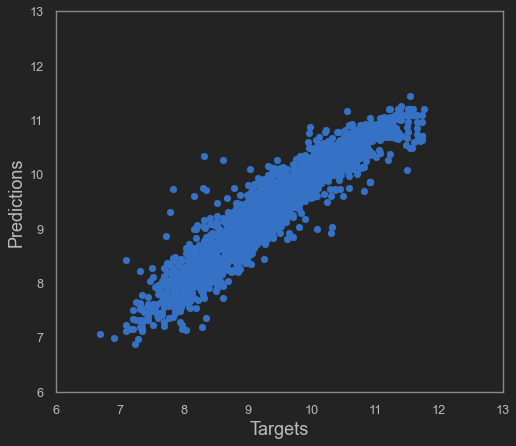

In [31]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets', size=18)
plt.ylabel('Predictions', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

#### Residual plot.
##### Residual = differences between the targets and the predictions

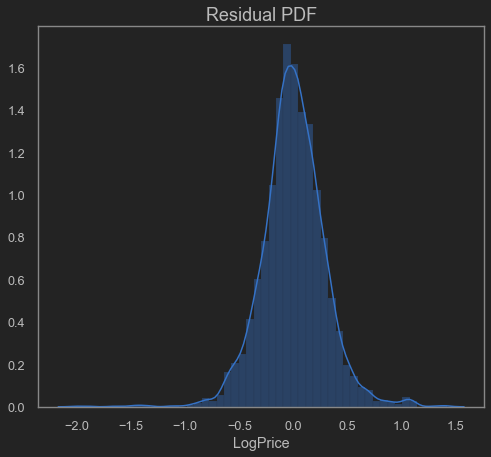

In [32]:
sns.distplot(y_train - y_hat)
plt.title('Residual PDF', size=18)
plt.show()
# Residual are normally distributed with mean = 0 (normality and homoscedasticity)

#### R squared

In [33]:
reg.score(X_train, y_train)

0.8849485492094937

#### Finding the weights and bias

In [34]:
reg.intercept_

9.415379879770514

In [35]:
reg.coef_

array([-0.10834397,  0.21888063,  0.50702491,  0.02583093,  0.00271501,
       -0.13396361, -0.20432869, -0.07814928, -0.10319911, -0.09312869,
       -0.07587858, -0.14180638, -0.0980039 , -0.15795634, -0.04301379,
       -0.01846564, -0.06002956,  0.25497094])

In [36]:
# creating a more readable summary table
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.108344
1,EngineV,0.218881
2,Year,0.507025
3,Brand_BMW,0.025831
4,Brand_Mercedes-Benz,0.002715
5,Brand_Mitsubishi,-0.133964
6,Brand_Renault,-0.204329
7,Brand_Toyota,-0.078149
8,Brand_Volkswagen,-0.103199
9,Body_hatch,-0.093129


#### We can not compare dummy variable with continuous variable.
##### Dummy variable should be compared with benchmark dummmy for the respective descrete variable,
##### for example in car brand, we do not have Audi, as it is the dropped one and other brands are compared wrt it.
##### Brand_BMW has +ve coefficient, means it is costlier than Audi, while Brand_Mitsubishi is cheaper than Audi as it is -ve.

## Testing

In [37]:
y_hat_test = reg.predict(X_test)

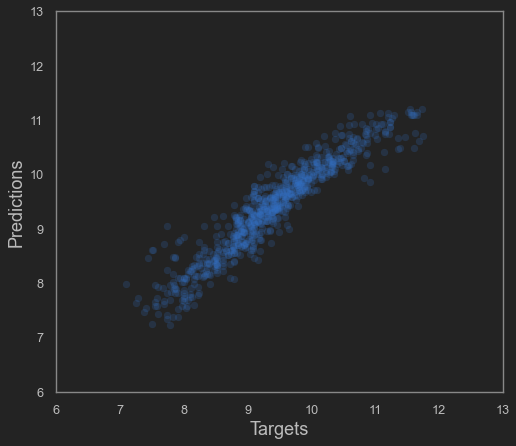

In [38]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets', size=18)
plt.ylabel('Predictions', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

#### The above scatter plot can be approximated by a straight line of slope 45 degrees, means it is a good approximation of the prices.
#### We can see that our model predicts the values of high price cars pretty close, but for low priced cars there are some outliers.

### R2 Score for test data

In [43]:
reg.score(X_test, y_test)

0.8875448762204204